In [9]:
from scripts.parallel_phoreal import *

# dirpath = 'R:/data/sodankyla_full/'
dirpath = '../data_store/data/marcell_MN/'

# data = []

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)

coords = (-93.4541, 47.5049)

# all_ATL03

# for i in range(1,2):
#     data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,\
#                          graph_detail=2, loss='arctan',file_index=i, keep_flagged=1, opsys='bad',f_scale=.1, altitude=413)
#     print(data)

csv_path = 'snow_cam_details.csv'
excel_df = pd.read_csv(csv_path).drop('Image', axis=1)
excel_df = excel_df[excel_df['Camera'] == 'marcell_MN']

from phoreal.reader import read_atl09_hr_profile

for i in range(N):

    print(all_ATL03[i])
    
    start_string = re.split(r"(.*ATL09_\d{8})",all_ATL03[i].replace("ATL03", "ATL09",1))[1]
    
    # print(start_string)
    
    # Get the directory and file name separately
    dir_path, file_name = os.path.split(start_string)
    # List all files in the directory
    matching_files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f)) and file_name in f]
    filepath = f'{dirpath}{matching_files[0]}'
    
    # print(filepath)
    try:
        atl09 = read_atl09_hr_profile(filepath,'gt1r')
    except (UnboundLocalError) as e:
        try:
            atl09 = read_atl09_hr_profile(filepath,'gt2r')
        except (UnboundLocalError) as e:
            try:
                atl09 = read_atl09_hr_profile(filepath,'gt3r')
            except (UnboundLocalError) as e:
                print('No strong beams')
                continue
    
    # print(list(atl09[0].columns))
    # print(list(atl09[0].bsnow_od))
    print(np.mean(atl09[0].column_od_asr[atl09[0].column_od_asr < 100]))

    # data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=coords, width=5,height=5,\
    #                      graph_detail=2, loss='arctan',file_index=i, keep_flagged=1, opsys='bad',f_scale=.1, altitude=413)
    print(excel_df.iloc[i]['Date'])
    print(excel_df.iloc[i]['FSC'])
    print()
    # print(list(zip(atl09[0].latitude,atl09[0].longitude)))
    
    # atl03 = get_atl03_struct(all_ATL03[1], 'gt1r', all_ATL08[1])
    
    # print(list(atl03.df.columns))
    
    # atl08 = get_atl08_struct(all_ATL08[1], 'gt1r', atl03)
    
    # print(list(atl08.df.columns))
    # print(list(zip(atl08.df.latitude,atl08.df.longitude)))

../data_store/data/marcell_MN/processed_ATL03_20181104085355_05610106_006_02.h5
0.31781828
04/11/2018
0.0

../data_store/data/marcell_MN/processed_ATL03_20190326134636_13460202_006_02.h5
1.1148787
26/03/2019
0.9

../data_store/data/marcell_MN/processed_ATL03_20190924050607_13460402_006_02.h5
0.35682002
24/09/2019
0.0

../data_store/data/marcell_MN/processed_ATL03_20191224004554_13460502_006_01.h5
1.1120712
24/12/2019
1.0

../data_store/data/marcell_MN/processed_ATL03_20200201111246_05610606_006_01.h5
0.8793025
01/02/2020
1.0

../data_store/data/marcell_MN/processed_ATL03_20200502065232_05610706_006_01.h5
1.4023018
02/05/2020
0.0

../data_store/data/marcell_MN/processed_ATL03_20200622160526_13460702_006_01.h5
0.3730208
22/06/2020
0.0

../data_store/data/marcell_MN/processed_ATL03_20200801023220_05610806_006_01.h5
0.10102405
01/08/2020
0.0

../data_store/data/marcell_MN/processed_ATL03_20200921114515_13460802_006_02.h5
0.1301416
21/09/2020
0.0

../data_store/data/marcell_MN/processed_ATL

['04/11/2018' '26/03/2019' '24/09/2019' '24/12/2019' '01/02/2020'
 '02/05/2020' '22/06/2020' '01/08/2020' '21/09/2020' '30/10/2020'
 '21/02/2021' '30/04/2021' '19/09/2021' '20/11/2021' '20/03/2022'
 '28/07/2022' '27/10/2022' '17/12/2022' '26/01/2023' '18/03/2023'
 '26/07/2023']


<Axes: xlabel='meanEgstrong', ylabel='asr'>

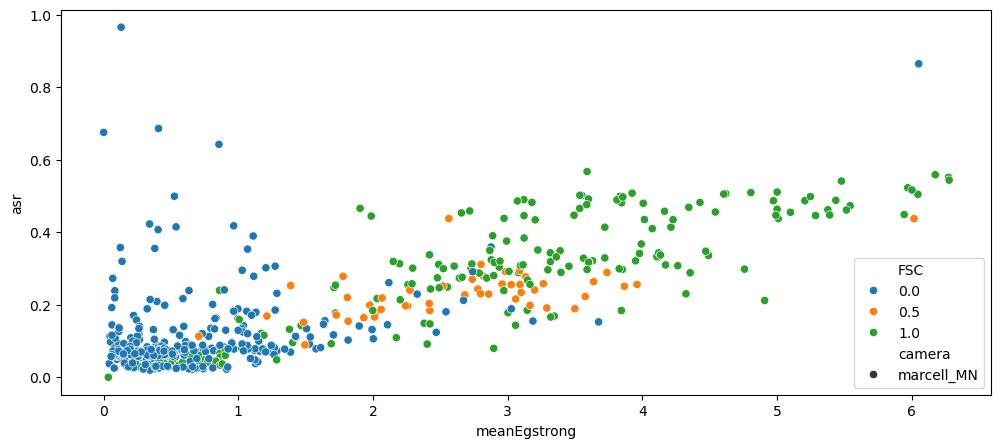

In [19]:
df = pd.read_pickle('five_sites_data_snow_cc.pkl')

loc_df = df[(df['camera']=='marcell_MN')]#&(df['date']=='29/01/2021')]
print(loc_df.date.unique())
plt.figure(figsize=(12,5))
sns.scatterplot(loc_df, x='meanEgstrong', y = 'asr' ,hue='FSC', palette='tab10', style='camera')